In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [7]:
# Filepath to the output data stored in a numpy array
filePath = 'TIM_SW_R375_Reverse.zmx_5x5BandpassData.npy'

# data is stored in a dictionary with the keys: 'X_Feeds', 'Y_Feeds', 'Wavs', and 'bandpass'.
# Each entry is a numpy array whose rows/columns are spatial/spectral feeds and whose third dimension 
# is the percent of rays through for the given wavelength in the corresponding position in the
# array 'Wavs'. The coordinates of the feeds evaluated are given by 'X_Feeds' and 'Y_Feeds' as 2D arrays.
data = np.load(filePath, allow_pickle=True).item()
X_feeds = data['X_Feeds']
Y_feeds = data['Y_Feeds']
wavs = data['Wavs']
bandpass = data['bandpass']

In [3]:
bandpass.shape

(5, 5, 5000)

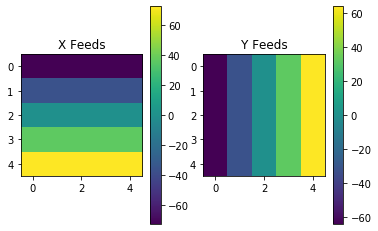

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2)
x_feeds = ax1.imshow(X_feeds)
ax1.set_title('X Feeds')
fig.colorbar(x_feeds, ax=ax1)
y_feeds = ax2.imshow(Y_feeds)
ax2.set_title('Y Feeds')
fig.colorbar(y_feeds, ax=ax2);

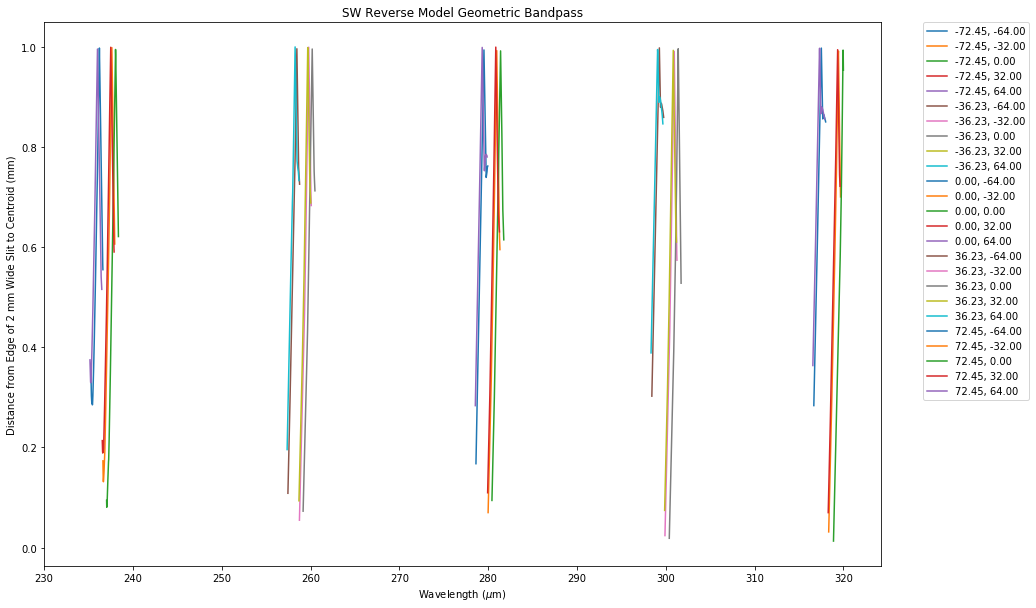

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
for i in range(len(X_feeds)):
    for j in range(len(X_feeds[0])):
        ax.plot(wavs, bandpass[i][j], **{'label': '{:.2f}, {:.2f}'.format(X_feeds[i][j], Y_feeds[i][j])});
ax.set_xticks(np.arange(wavs[0], wavs[-1]+10, step=10))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
ax.set_title('SW Reverse Model Geometric Bandpass')
ax.set_ylabel('Distance from Edge of 2 mm Wide Slit to Centroid (mm)')
ax.set_xlabel('Wavelength ($\mu$m)');

We use the distance from the edge of the 2 mm wide slit to the centroid location of the focus at the slit for each feedhorn to determine the wavelength of the beam to launch from the feed position in the time-reversed model. Data is omitted for wavelength regimes where the chief ray of the system is clipped at the slit.

In [9]:
tmp_bandpass = bandpass
tmp_bandpass[np.isnan(bandpass)] = 0.0
wavs[np.argmax(tmp_bandpass, 2)]

array([[317.5155031 , 319.44188838, 319.9639928 , 319.35187037,
        317.31746349],
       [299.27785557, 300.95219044, 301.40228046, 300.84416883,
        299.07981596],
       [279.52790558, 280.96819364, 281.40028006, 280.86017203,
        279.32986597],
       [258.46369274, 259.79595919, 260.19203841, 259.68793759,
        258.26565313],
       [236.22924585, 237.63352671, 238.04760952, 237.5075015 ,
        236.01320264]])

In [7]:
plt.plot(wavs, bandpass[6][4]);

IndexError: index 6 is out of bounds for axis 0 with size 5

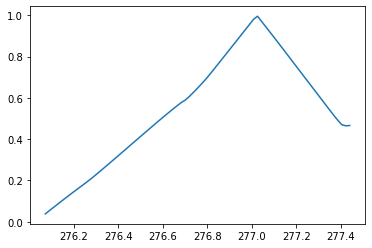

In [8]:
plt.plot(wavs, bandpass[3][2]);

In [63]:
bandpass[3][2][523]
wavs[523]

277.1171171171171

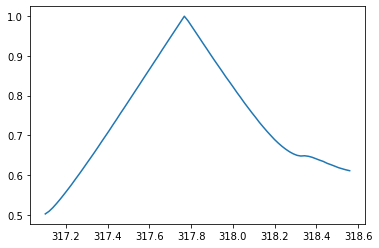

In [9]:
plt.plot(wavs, bandpass[0][0]);

In [16]:
wavs[np.argmax(bandpass[0][0])]

317.8378378378378

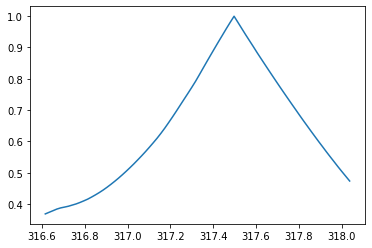

In [10]:
plt.plot(wavs, bandpass[0][4]);

In [14]:
wavs[np.argmax(bandpass[0][4])]

317.65765765765764